# Experiment №5

We use sample "good" set of parameter and launch model with $100$ different seeds.

In [1]:
from multiprocessing import Pool

import ppmodel
from ppmodel import ModelParams

if __name__ == '__main__':
    p = Pool(4)
    params = []
    for i in range(0, 100):
        params.append(ModelParams("S", 100, 100, 400, 2700, 75, 14, i))
    steps = p.map(ppmodel.f, params)

In [2]:
import numpy as np
import scipy.stats as st

steps.sort()
n_bins = int(np.ceil(np.sqrt(len(steps))))
sigma = np.std(steps)
mu = np.mean(steps)
skew = st.skew(steps)

We make a histogram which show model lifetime distribution. 

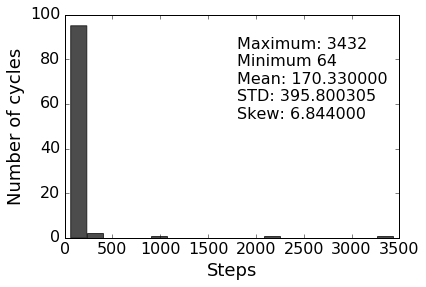

In [31]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

n, bins, patches = plt.hist(steps, 20, color="black", alpha=0.7,)

plt.text(1800,90,"Maximum: %i\nMinimum %i\nMean: %f\nSTD: %f\nSkew: %f" % (max(steps), min(steps), mu, sigma, skew),
         size=16, rotation=0,
         ha="left", va="top")

plt.ylabel("Number of cycles", fontsize=18)
plt.xlabel("Steps", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

We use sample "bad" set of parameter and launch model with $100$ different seeds.

In [4]:
from multiprocessing import Pool

import ppmodel
from ppmodel import ModelParams


if __name__ == '__main__':
    p = Pool(4)
    params = []
    for i in range(0, 100):
        params.append(ModelParams("S", 100, 100, 1, 1800, 25, 14, i))
    steps2 = p.map(ppmodel.f, params)

In [5]:
import numpy as np
import scipy.stats as st

steps2.sort()
n_bins2 = int(np.ceil(np.sqrt(len(steps))))
sigma2 = np.std(steps2)
mu2 = np.mean(steps2)
skew2 = st.skew(steps2)

We make a histogram which show model lifetime distribution.

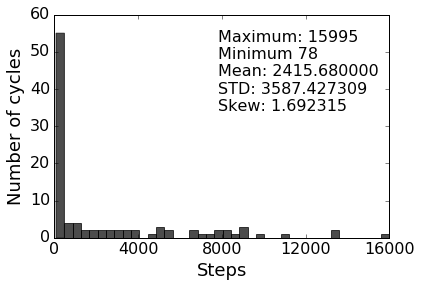

In [26]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

n, bins, patches = plt.hist(steps2, 40, color="black", alpha=0.7)

plt.text(7800,56,"Maximum: %i\nMinimum %i\nMean: %f\nSTD: %f\nSkew: %f" % (max(steps2), min(steps2), mu2, sigma2, skew2),
         size=16, rotation=0,
         ha="left", va="top")

plt.ylabel("Number of cycles", fontsize=18)
plt.xlabel("Steps", fontsize=18)

plt.yticks(fontsize=16)
plt.xticks([0,4000,8000,12000, 16000], fontsize=16)
plt.draw()
plt.show()